In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from roboflow import Roboflow

'''
rf = Roboflow(api_key="cHei9gvcHM5yhX40sx9a") # THIS API KEY IS REVOKED. PLEASE USE YOUR OWN API KEY
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov5")
'''

rf = Roboflow(api_key="foYmYp1nEeMQN3vmWhhU")
project = rf.workspace("label-gdoal").project("soccer-oilql")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Soccer-2 in yolov5pytorch:: 100%|██████████| 6012/6012 [00:04<00:00, 1460.94it/s]


In [ ]:
dataset.location

'/content/Soccer-2'

In [ ]:
import shutil

shutil.move('Soccer-2/train',
            'Soccer-2/Soccer-2/train'
            )

shutil.move('Soccer-2/test',
            'Soccer-2/Soccer-2/test'
            )

shutil.move('Soccer-2/valid',
            'Soccer-2/Soccer-2/valid'
            )

'Soccer-2/Soccer-2/valid'

In [ ]:
import wandb
wandb.login(key='4123b9360afdc94c1dd57892d4a5887bda7fa8e7')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11s.pt")
train_model = model.train(data="/content/Soccer-2/data.yaml", epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 186MB/s]


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Soccer-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 24.5MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.6MB/s]


AMP: checks passed ✅


train: Scanning /content/Soccer-2/Soccer-2/train/labels... 2256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2256/2256 [00:01<00:00, 1539.13it/s]

train: New cache created: /content/Soccer-2/Soccer-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Soccer-2/Soccer-2/valid/labels... 378 images, 0 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<00:00, 731.71it/s]

val: New cache created: /content/Soccer-2/Soccer-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.54G      1.492      1.153     0.9825        309        640: 100%|██████████| 141/141 [01:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]

                   all        378       6092      0.686       0.59       0.66      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.53G      1.404     0.7568     0.9554        285        640: 100%|██████████| 141/141 [00:58<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]

                   all        378       6092       0.74      0.649      0.695        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.5G       1.38     0.7284     0.9551        356        640: 100%|██████████| 141/141 [00:59<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.60it/s]

                   all        378       6092      0.931      0.634      0.725      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.55G      1.372      0.725     0.9498        262        640: 100%|██████████| 141/141 [01:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]

                   all        378       6092      0.796      0.702      0.741      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.5G      1.338     0.7057     0.9403        373        640: 100%|██████████| 141/141 [00:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]

                   all        378       6092      0.823      0.688      0.759      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.4G      1.328     0.6857     0.9424        411        640: 100%|██████████| 141/141 [00:57<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]

                   all        378       6092      0.754      0.702      0.733      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.45G      1.316     0.6807     0.9378        360        640: 100%|██████████| 141/141 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        378       6092      0.805      0.734      0.756      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.65G      1.307     0.6697      0.936        349        640: 100%|██████████| 141/141 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]

                   all        378       6092      0.779      0.713      0.765      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.49G        1.3     0.6558     0.9307        433        640: 100%|██████████| 141/141 [01:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]

                   all        378       6092      0.826      0.711      0.762       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.55G      1.279     0.6446     0.9267        378        640: 100%|██████████| 141/141 [00:59<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        378       6092      0.837      0.723      0.774      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.55G      1.264     0.6368     0.9235        349        640: 100%|██████████| 141/141 [00:59<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.96it/s]

                   all        378       6092      0.768      0.702      0.753      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.37G      1.258     0.6345     0.9228        338        640: 100%|██████████| 141/141 [00:57<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]

                   all        378       6092        0.8      0.732      0.769      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.49G      1.235     0.6176     0.9155        381        640: 100%|██████████| 141/141 [00:57<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]

                   all        378       6092      0.814      0.731      0.762      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.55G      1.244     0.6277     0.9196        291        640: 100%|██████████| 141/141 [00:59<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]

                   all        378       6092      0.824      0.732      0.784      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.45G      1.237     0.6177     0.9164        363        640: 100%|██████████| 141/141 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.78it/s]

                   all        378       6092      0.833      0.737      0.786      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.48G      1.223     0.6061     0.9149        369        640: 100%|██████████| 141/141 [00:58<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.78it/s]

                   all        378       6092       0.77      0.763      0.791      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.47G      1.211     0.5994     0.9099        297        640: 100%|██████████| 141/141 [00:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]

                   all        378       6092      0.775      0.752      0.774      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.54G       1.19     0.5865     0.9103        313        640: 100%|██████████| 141/141 [00:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        378       6092      0.823      0.752      0.797      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.66G      1.183     0.5842     0.9076        379        640: 100%|██████████| 141/141 [00:57<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.96it/s]

                   all        378       6092       0.79      0.738      0.786      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.52G      1.188     0.5846     0.9082        205        640: 100%|██████████| 141/141 [00:57<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        378       6092      0.839      0.756      0.795        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.56G      1.186      0.585     0.9054        392        640: 100%|██████████| 141/141 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]

                   all        378       6092      0.853      0.761      0.793      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.5G      1.169     0.5774     0.9009        432        640: 100%|██████████| 141/141 [00:57<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]

                   all        378       6092      0.829      0.763      0.793      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.51G      1.175      0.575     0.9044        329        640: 100%|██████████| 141/141 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]

                   all        378       6092      0.863      0.754      0.812      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.5G      1.154     0.5612     0.9015        372        640: 100%|██████████| 141/141 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]

                   all        378       6092      0.866      0.757      0.801      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.51G      1.146     0.5551     0.8985        379        640: 100%|██████████| 141/141 [00:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]

                   all        378       6092      0.845       0.77      0.799      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.61G      1.134     0.5545     0.8981        386        640: 100%|██████████| 141/141 [00:58<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        378       6092      0.843      0.757      0.793      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.49G      1.128     0.5488     0.8984        378        640: 100%|██████████| 141/141 [00:59<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]

                   all        378       6092      0.847      0.777      0.807      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.54G      1.121     0.5442     0.8953        318        640: 100%|██████████| 141/141 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        378       6092      0.854      0.767      0.804      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.45G      1.114     0.5408     0.8909        391        640: 100%|██████████| 141/141 [00:57<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]

                   all        378       6092      0.864      0.775      0.806      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.54G      1.104     0.5381      0.891        300        640: 100%|██████████| 141/141 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.71it/s]

                   all        378       6092      0.862      0.776      0.813      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.5G      1.097     0.5267     0.8882        503        640: 100%|██████████| 141/141 [00:58<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        378       6092      0.843      0.787      0.811      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.52G      1.088     0.5258      0.885        392        640: 100%|██████████| 141/141 [00:58<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.05it/s]

                   all        378       6092      0.859      0.766       0.81       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.64G      1.076      0.515     0.8825        331        640: 100%|██████████| 141/141 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]

                   all        378       6092      0.868      0.782       0.82      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.54G      1.068     0.5118     0.8839        379        640: 100%|██████████| 141/141 [00:58<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.89it/s]

                   all        378       6092      0.849      0.775      0.817      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.57G      1.059     0.5105     0.8835        415        640: 100%|██████████| 141/141 [00:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]

                   all        378       6092      0.895      0.768      0.821      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.45G      1.052     0.5031     0.8826        442        640: 100%|██████████| 141/141 [00:58<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]

                   all        378       6092       0.87      0.772      0.815      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.51G      1.049     0.5039     0.8805        388        640: 100%|██████████| 141/141 [00:56<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]

                   all        378       6092      0.861      0.782      0.814      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.51G      1.039     0.4986     0.8755        374        640: 100%|██████████| 141/141 [00:57<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.86it/s]

                   all        378       6092      0.872      0.788       0.82      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.44G      1.014     0.4874     0.8736        286        640: 100%|██████████| 141/141 [00:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        378       6092      0.876       0.78      0.822      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.53G       1.02     0.4905     0.8748        364        640: 100%|██████████| 141/141 [00:58<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        378       6092      0.871      0.786      0.824      0.564


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.37G     0.9828     0.4686      0.881        220        640: 100%|██████████| 141/141 [00:56<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]

                   all        378       6092      0.868      0.789      0.827      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.38G     0.9758      0.464     0.8782        230        640: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]

                   all        378       6092      0.886      0.783      0.829      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.38G     0.9479     0.4511     0.8745        241        640: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]

                   all        378       6092       0.86      0.782      0.823      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.37G     0.9386     0.4483     0.8704        249        640: 100%|██████████| 141/141 [00:56<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        378       6092      0.884      0.794      0.827      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.38G     0.9285     0.4431     0.8666        247        640: 100%|██████████| 141/141 [00:55<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]

                   all        378       6092      0.876      0.794      0.828       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.38G     0.9141     0.4378     0.8672        237        640: 100%|██████████| 141/141 [00:55<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.44it/s]

                   all        378       6092      0.908      0.778      0.832      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.39G      0.906     0.4331     0.8655        239        640: 100%|██████████| 141/141 [00:56<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        378       6092      0.886      0.794      0.831      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.38G     0.8948     0.4305     0.8627        254        640: 100%|██████████| 141/141 [00:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        378       6092      0.869      0.797      0.828      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.37G     0.8844     0.4256     0.8618        264        640: 100%|██████████| 141/141 [00:57<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        378       6092      0.886      0.797      0.833      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.38G     0.8744     0.4197     0.8613        232        640: 100%|██████████| 141/141 [00:59<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.79it/s]

                   all        378       6092      0.885      0.796      0.831       0.58



50 epochs completed in 0.897 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]


                   all        378       6092      0.884      0.797      0.832      0.581
                  ball        371        371      0.724      0.367       0.41      0.166
            goalkeeper        245        245      0.958      0.947      0.978      0.721
                player        378       5028      0.936      0.962      0.984      0.742
               referee        314        448       0.92      0.911      0.957      0.696
Speed: 0.3ms preprocess, 5.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /content/Soccer-2/Soccer-2/valid/labels.cache... 378 images, 0 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.55it/s]


                   all        378       6092      0.882      0.795       0.83      0.584
                  ball        371        371      0.716      0.358      0.401      0.166
            goalkeeper        245        245      0.954      0.947      0.977      0.725
                player        378       5028      0.939      0.962      0.984      0.744
               referee        314        448      0.918      0.911      0.956        0.7
Speed: 0.3ms preprocess, 10.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train2


array([     0.1662,     0.72457,     0.74444,     0.69986])

In [ ]:
import pandas as pd

# Đường dẫn tới file results.csv
csv_path = "/content/runs/detect/train/results.csv"

# Đọc file CSV
df = pd.read_csv(csv_path)

df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,74.4996,1.49247,1.15315,0.98247,0.68600,0.59044,0.65967,0.36930,1.38974,0.79586,1.02146,0.000414,0.000414,0.000414
1,2,141.5640,1.40358,0.75682,0.95544,0.74028,0.64906,0.69490,0.39993,1.33682,0.77484,0.99989,0.000814,0.000814,0.000814
2,3,206.7620,1.38020,0.72845,0.95509,0.93145,0.63380,0.72461,0.41425,1.37241,0.71848,1.01757,0.001198,0.001198,0.001198
3,4,274.1820,1.37161,0.72503,0.94983,0.79630,0.70187,0.74106,0.42839,1.28396,0.73576,0.97760,0.001176,0.001176,0.001176
4,5,339.7420,1.33780,0.70568,0.94026,0.82339,0.68825,0.75869,0.44880,1.25064,0.68937,0.97180,0.001151,0.001151,0.001151
5,6,404.5910,1.32789,0.68573,0.94242,0.75378,0.70214,0.73344,0.44190,1.30559,0.68452,0.99762,0.001126,0.001126,0.001126
6,7,468.0800,1.31565,0.68066,0.93779,0.80492,0.73358,0.75592,0.45818,1.26224,0.67171,0.98571,0.001102,0.001102,0.001102
7,8,532.3470,1.30744,0.66971,0.93600,0.77946,0.71348,0.76502,0.46331,1.21527,0.67692,0.96611,0.001077,0.001077,0.001077
8,9,601.8640,1.29984,0.65581,0.93074,0.82624,0.71150,0.76225,0.45993,1.22454,0.65707,0.96369,0.001052,0.001052,0.001052
9,10,666.3350,1.27948,0.64460,0.92670,0.83698,0.72308,0.77390,0.46717,1.24006,0.62610,0.96794,0.001027,0.001027,0.001027


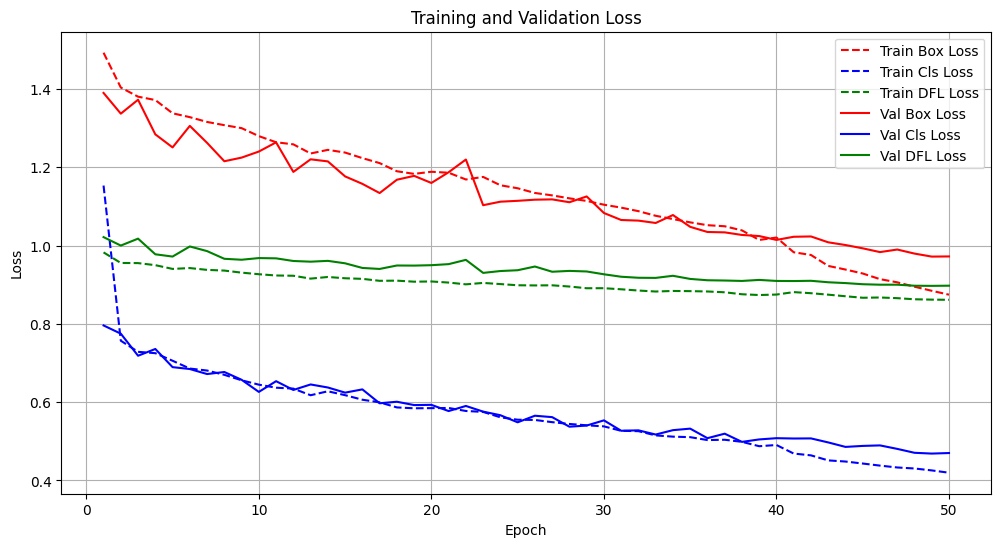

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Vẽ Loss trong quá trình Train và Validation
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='red', linestyle='--')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss', color='blue', linestyle='--')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss', color='green', linestyle='--')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', color='red')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', color='blue')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import shutil

# Đường dẫn đến mô hình đã huấn luyện
trained_model_path = "/content/runs/detect/train/weights/best.pt"  # Hoặc "last.pt"

# Đường dẫn lưu trên Google Drive
save_path = "/content/drive/MyDrive/best_yolov11s_model.pt"  # Đặt tên file theo ý bạn

# Sao chép file mô hình vào Google Drive
shutil.copy(trained_model_path, save_path)

print(f"Model đã được lưu vào Google Drive tại: {save_path}")


Model đã được lưu vào Google Drive tại: /content/drive/MyDrive/best_yolov11s_model.pt


In [ ]:
from ultralytics import YOLO

# Tải mô hình đã lưu
model = YOLO("/content/drive/MyDrive/best_yolov8_model.pt")  # Đường dẫn tới file .pt

In [ ]:
# Dự đoán trên ảnh
results = model.predict(source="/content/drive/MyDrive/1.jpg", save = True) # Đường dẫn ảnh


image 1/1 /content/drive/MyDrive/1.jpg: 384x640 1 goalkeeper, 15 players, 2 referees, 56.4ms
Speed: 3.4ms preprocess, 56.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


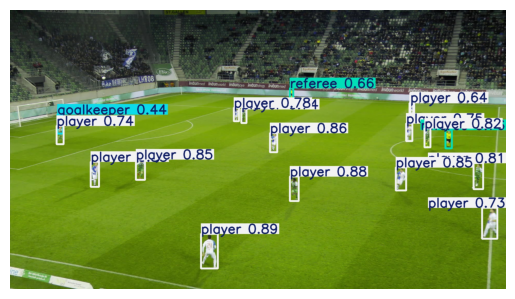

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Đọc ảnh đã dự đoán
predicted_image_path = "/content/runs/detect/predict/1.jpg"  # Đường dẫn ảnh đã dự đoán
img = cv2.imread(predicted_image_path)

# Hiển thị ảnh
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


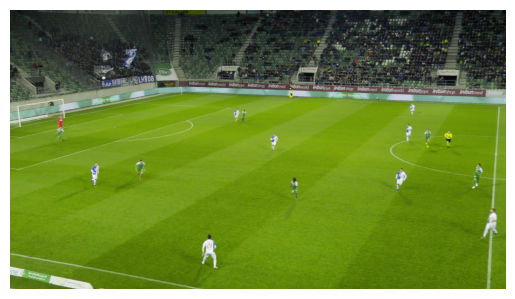

In [ ]:
# Hiển thị ảnh
img_url = "/content/drive/MyDrive/1.jpg"
img = cv2.imread(img_url)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()